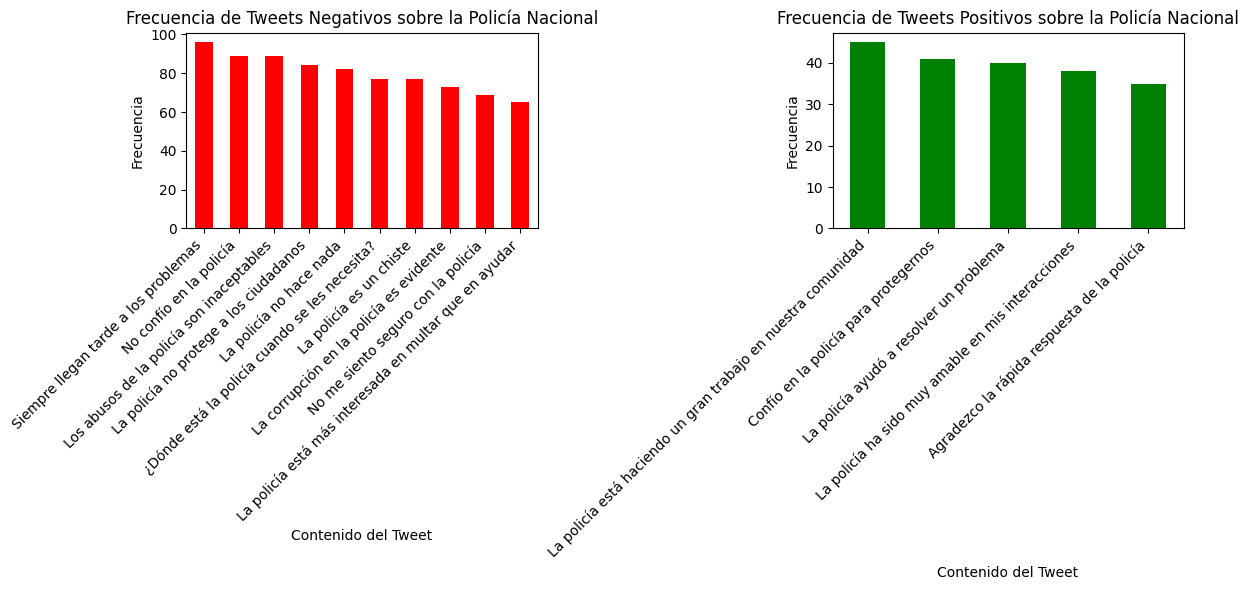

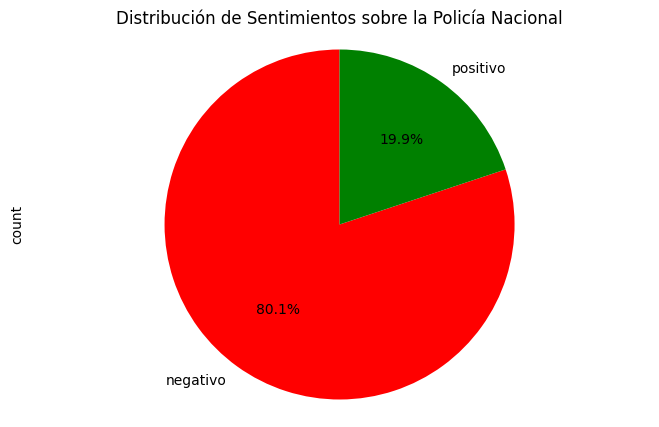

Ejemplos de Tweets Negativos:
   tweet_id    usuario                                  contenido
0         1  usuario_1                    No confío en la policía
2         3  usuario_3    La corrupción en la policía es evidente
3         4  usuario_4  Los abusos de la policía son inaceptables
4         5  usuario_5       Siempre llegan tarde a los problemas
5         6  usuario_6       Siempre llegan tarde a los problemas

Ejemplos de Tweets Positivos:
    tweet_id     usuario                                          contenido
1          2   usuario_2              Confío en la policía para protegernos
7          8   usuario_8        Agradezco la rápida respuesta de la policía
11        12  usuario_12  La policía ha sido muy amable en mis interacci...
12        13  usuario_13            La policía ayudó a resolver un problema
33        34  usuario_34              Confío en la policía para protegernos


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generar datos ficticios
np.random.seed(42)  # Para reproducibilidad
n_tweets = 1000  # Número total de tweets

# Contenido de tweets negativos y positivos
contenido_negativos = [
    "La policía no hace nada",
    "Siempre llegan tarde a los problemas",
    "¿Dónde está la policía cuando se les necesita?",
    "La policía es un chiste",
    "No confío en la policía",
    "La policía está más interesada en multar que en ayudar",
    "La policía no protege a los ciudadanos",
    "Los abusos de la policía son inaceptables",
    "No me siento seguro con la policía",
    "La corrupción en la policía es evidente"
]

contenido_positivos = [
    "La policía ayudó a resolver un problema",
    "Agradezco la rápida respuesta de la policía",
    "La policía está haciendo un gran trabajo en nuestra comunidad",
    "Confío en la policía para protegernos",
    "La policía ha sido muy amable en mis interacciones"
]

# Crear listas de contenido de tweets
# Crear una lista combinada de contenidos y especificar las probabilidades
p_negativos = 0.8
p_positivos = 0.2

contenido_tweets = np.random.choice(
    contenido_negativos + contenido_positivos,
    n_tweets,
    p=[p_negativos / len(contenido_negativos)] * len(contenido_negativos) + \
      [p_positivos / len(contenido_positivos)] * len(contenido_positivos)
)

# Crear el DataFrame
data = {
    'tweet_id': range(1, n_tweets + 1),
    'usuario': [f'usuario_{i}' for i in range(1, n_tweets + 1)],
    'contenido': contenido_tweets,
    'sentimiento': np.where(np.isin(contenido_tweets, contenido_negativos), 'negativo', 'positivo')
}

df = pd.DataFrame(data)

# Filtrar tweets por sentimiento
df_negativos = df[df['sentimiento'] == 'negativo']
df_positivos = df[df['sentimiento'] == 'positivo']

# Contar la frecuencia de tweets negativos y positivos
frecuencia_negativos = df_negativos['contenido'].value_counts()
frecuencia_positivos = df_positivos['contenido'].value_counts()

# Crear gráfico de barras para tweets negativos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Gráfico 1
frecuencia_negativos.plot(kind='bar', color='red')
plt.title('Frecuencia de Tweets Negativos sobre la Policía Nacional')
plt.xlabel('Contenido del Tweet')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Crear gráfico de barras para tweets positivos
plt.subplot(1, 2, 2)  # Gráfico 2
frecuencia_positivos.plot(kind='bar', color='green')
plt.title('Frecuencia de Tweets Positivos sobre la Policía Nacional')
plt.xlabel('Contenido del Tweet')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Gráfico de comparación de sentimientos
sentimiento_counts = df['sentimiento'].value_counts()
plt.figure(figsize=(8, 5))
sentimiento_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribución de Sentimientos sobre la Policía Nacional')
plt.axis('equal')  # Igualar el aspecto asegura que el pie sea un círculo
plt.show()

# Mostrar ejemplos de Tweets
print("Ejemplos de Tweets Negativos:")
print(df_negativos[['tweet_id', 'usuario', 'contenido']].head(5))

print("\nEjemplos de Tweets Positivos:")
print(df_positivos[['tweet_id', 'usuario', 'contenido']].head(5))